In [ ]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

from statsmodels.tsa.stattools import grangercausalitytests
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from matplotlib.lines import Line2D
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/doge_coin_dataset_2021_final_set.csv", encoding = "utf-8")

In [ ]:
df.count()

tweet_id            45760
user_id             45760
user_name           45760
original_tweet      45760
year                45760
month               45760
day                 45760
time                45760
source              45760
cleaned_tweet       45760
predicted_labels    45760
hugging_labels      45760
dtype: int64

In [ ]:
df.head()

,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source,cleaned_tweet,predicted_labels,hugging_labels
0,1.360000e+18,3.134341e+09,Nobody,"You can’t stop us, you fucks #dogecoin https:/...",2021,1,31,22:50:54,Twitter for iPhone,"you can’t stop us, you fucks #dogecoin",0,-1
1,1.360000e+18,1.320000e+18,Nobody,https://t.co/EGyJXssO6l\n\nLet's share it to t...,2021,1,31,23:28:43,Twitter for Android,let's share it to the entire social network to...,0,1
2,1.360000e+18,1.290000e+18,Nobody,#dogecoin is sounding more and more like essen...,2021,1,31,23:28:34,Twitter for Android,#dogecoin is sounding more and more like essen...,0,-1
3,1.360000e+18,1.360000e+18,Nobody,to spread the past week and xrp link https t h...,2021,1,31,23:28:31,Error-log,to spread the past week and xrp link https t h...,0,0
4,1.360000e+18,1.350000e+18,Nobody,If every owner that owns a dog would put 10$ i...,2021,1,31,23:28:27,Twitter for iPhone,if every owner that owns a dog would put 10$ i...,0,0


In [ ]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12])

In [ ]:
elon_df = pd.read_csv("/content/elonmusk_doge_tweets.csv", encoding="utf-8")

In [ ]:
elon_df.head()

,tweet_id,original_tweet,cleaned_tweeet,year,month,day,time,labels
0,1.250000e+18,@28delayslater @justpaulinelol Dogecoin Mode,dogecoin mode,2020,4,25,13:29:52,1
1,1.280000e+18,"@izzynobre Excuse me, I only sell Doge!","excuse me, i only sell doge!",2020,7,18,00:53:43,-1
2,1.340000e+18,One word: Doge,one word: doge,2020,12,20,09:30:04,1
3,1.420000e+18,@AshleyIllusion1 @lexfridman Lil X is hodling ...,lil x is hodling his doge like a champ. litera...,2021,7,17,16:53:53,0
4,1.410000e+18,"@CGDaveMac Maybe if it sees a Shiba Inu, the c...","maybe if it sees a shiba inu, the car renders ...",2021,7,13,02:33:26,0


In [ ]:
elon_df.count()

tweet_id          68
original_tweet    68
cleaned_tweeet    68
year              68
month             68
day               68
time              68
labels            68
dtype: int64

In [ ]:
elon_df.year.unique()

array([2020, 2021, 2019, 2022])

In [ ]:
elon_df_2021 = elon_df[elon_df.year == 2021]
elon_df_2021.count()

tweet_id          57
original_tweet    57
cleaned_tweeet    57
year              57
month             57
day               57
time              57
labels            57
dtype: int64

In [ ]:
set(elon_df_2021.month.unique())

{2, 3, 4, 5, 7, 8, 9, 10, 11, 12}

In [ ]:
elon_df_2021[elon_df_2021.month == 5].count()

tweet_id          13
original_tweet    13
cleaned_tweeet    13
year              13
month             13
day               13
time              13
labels            13
dtype: int64

In [ ]:
elon_tweetCount_2021 = {}
for month in range(1, 13):
  elon_tweetCount_2021[month] = elon_df_2021[elon_df_2021.month == month].count().tweet_id
elon_tweetCount_2021.values()

dict_values([0, 12, 9, 4, 13, 0, 6, 1, 1, 5, 4, 2])

In [ ]:
np.array(list(elon_tweetCount_2021.values())).reshape(-1,1)

array([[ 0],
       [12],
       [ 9],
       [ 4],
       [13],
       [ 0],
       [ 6],
       [ 1],
       [ 1],
       [ 5],
       [ 4],
       [ 2]])

In [ ]:
scaler = MinMaxScaler()

elon_tweetCount_2021_scaled = scaler.fit_transform(np.array(list(elon_tweetCount_2021.values())).reshape(-1,1))
elon_tweetCount_2021_scaled.T[0]

array([0.        , 0.92307692, 0.69230769, 0.30769231, 1.        ,
       0.        , 0.46153846, 0.07692308, 0.07692308, 0.38461538,
       0.30769231, 0.15384615])

In [ ]:
overall_tweetCount_2021 = {}
for month in range(1, 13):
  overall_tweetCount_2021[month] = df[df.month == month].count().tweet_id

overall_tweetCount_2021.values()

dict_values([2618, 14697, 12625, 1878, 5807, 0, 2163, 854, 1323, 1760, 1094, 941])

In [ ]:
scaler = MinMaxScaler()

overall_tweetCount_2021_scaled = scaler.fit_transform(np.array(list(overall_tweetCount_2021.values())).reshape(-1,1))
overall_tweetCount_2021_scaled.T[0]

array([0.17813159, 1.        , 0.85901885, 0.12778118, 0.39511465,
       0.        , 0.14717289, 0.0581071 , 0.09001837, 0.11975233,
       0.07443696, 0.06402667])

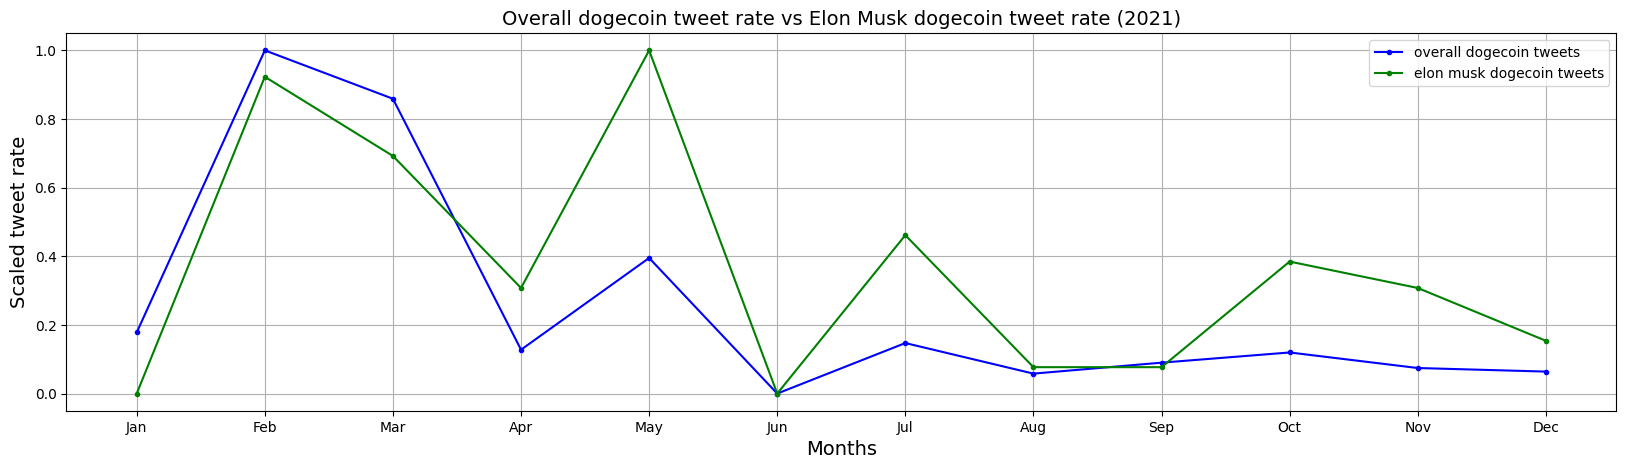

In [ ]:
data = {"month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
        "overall tweet rate": overall_tweetCount_2021_scaled.T[0],
        "elon musk tweet rate": elon_tweetCount_2021_scaled.T[0]
       }
plt.rcParams["figure.figsize"] = (20,5)
plot_df = pd.DataFrame(data, columns=list(data.keys()))
fig = plt.figure(figsize=(20, 5), dpi=100)

plt.plot(plot_df["month"], plot_df["overall tweet rate"], label="overall dogecoin tweets", color='blue', marker='o', markersize=3)
plt.plot(plot_df["month"], plot_df["elon musk tweet rate"], label="elon musk dogecoin tweets", color='green', marker='o', markersize=3)
plt.title("Overall dogecoin tweet rate vs Elon Musk dogecoin tweet rate (2021)", fontsize=14)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Scaled tweet rate", fontsize=14)
plt.legend(loc="upper right")
plt.grid(True)
fig.savefig('overall_tweet_vs_elon_musk_tweet.png') 
plt.show()

In [ ]:
data1 = np.array(list(plot_df["overall tweet rate"]))
data2 = np.array(list(plot_df["elon musk tweet rate"]))

In [ ]:
corr, _ = pearsonr(data1, data2)
print('Correlation between the amount of overall tweets and amount of elon musk tweet: %.3f' % corr)

Correlation between the amount of overall tweets and amount of elon musk tweet: 0.777


In [ ]:
doge_df = pd.read_csv("/content/DOGE_financial_data - DOGE_financial_data.csv", encoding="utf-8")

In [ ]:
doge_df.head()

,time,high,low,open,volumefrom,volumeto,close
0,2018-01-01 0:00:00,0.007694,0.007524,0.007697,507798.96,3836.72,0.007556
1,2018-01-01 1:00:00,0.007595,0.007339,0.007556,480835.71,3628.02,0.007545
2,2018-01-01 2:00:00,0.007512,0.007319,0.007545,134284.87,999.54,0.007443
3,2018-01-01 3:00:00,0.007567,0.007409,0.007443,234693.59,1755.06,0.007478
4,2018-01-01 4:00:00,0.007817,0.007344,0.007478,623330.89,4812.84,0.007721


In [ ]:
# extract closing price for each day of year 2021
coun = 0
months = list(calendar.month_name)
closing_price = []
monthly_price_ls_2021 = {}
for ix, row in doge_df.iterrows():
  date, time = row.time.split()
  year, month, day = date.split("-")
  year, month, day = int(year), int(month), int(day)
  hr, min, sec = time.split(":")
  hr, min, sec = int(hr), int(min), int(sec)
  month_ends = calendar.monthrange(year, month)[1]

  if year == 2021 and hr == 23 and day <= month_ends:
    closing_price.append(row.close)
    # coun += 1
  if year == 2021 and day == month_ends and hr == 23:
    monthly_price_ls_2021[months[month]] = np.array(closing_price)
    closing_price = []

In [ ]:
monthly_price_ls_2021["May"]

array([0.3251, 0.3109, 0.3657, 0.4498, 0.5436, 0.4827, 0.5673, 0.5245,
       0.4677, 0.3728, 0.4083, 0.3263, 0.4055, 0.4621, 0.4199, 0.424 ,
       0.4015, 0.391 , 0.2735, 0.3278, 0.2955, 0.282 , 0.2523, 0.3004,
       0.2831, 0.2902, 0.2734, 0.2563, 0.2495, 0.2485, 0.2664])

In [ ]:
# transform price into scaled list
scaler = MinMaxScaler()

monthly_scaled_price_ls_2021 = {}
for key, value in monthly_price_ls_2021.items():
  monthly_scaled_price_ls_2021[key] = scaler.fit_transform(np.array(value).reshape(-1,1)).T[0]
  print(key , value)
  print(key, monthly_scaled_price_ls_2021[key])
  print()

January [0.004698 0.00846  0.007715 0.007986 0.00814  0.008475 0.007891 0.007909
 0.008207 0.007952 0.007253 0.006572 0.007121 0.00772  0.007784 0.007661
 0.007504 0.007589 0.007492 0.007461 0.006677 0.007022 0.007057 0.007172
 0.006904 0.006792 0.006188 0.03026  0.03774  0.02335  0.03033 ]
January [0.         0.11385509 0.09130803 0.09950971 0.10417045 0.11430906
 0.09663459 0.09717935 0.10619817 0.09848072 0.07732583 0.0567157
 0.07333091 0.09145935 0.09339628 0.08967375 0.08492222 0.0874947
 0.08455905 0.08362085 0.05989347 0.07033473 0.07139398 0.0748744
 0.06676351 0.06337389 0.04509412 0.77362145 1.         0.56449367
 0.77573997]

February [0.02883 0.026   0.03103 0.04426 0.03892 0.04785 0.06502 0.06554 0.05785
 0.05996 0.05737 0.05771 0.05493 0.05182 0.04657 0.04437 0.04115 0.0488
 0.04542 0.04485 0.04618 0.04417 0.0392  0.04653 0.04114 0.04186 0.04165
 0.03986]
February [0.07157309 0.         0.12721295 0.46181082 0.32675771 0.55260496
 0.98684876 1.         0.8055134  0.85887

In [ ]:
# extract elon musk monthly tweets for year 2021
monthly_elon_tweets_2021 = {}
coun = 1
for month in months:
  if month == "":
    continue
  monthly_elon_tweets_2021[month] = np.array(list(set(elon_df_2021[elon_df_2021.month == coun].day)))
  coun += 1
monthly_elon_tweets_2021

{'April': array([ 1, 28, 15]),
 'August': array([23]),
 'December': array([14, 23]),
 'February': array([ 4,  6,  7,  8, 10, 11, 14, 20]),
 'January': array([], dtype=float64),
 'July': array([ 1,  2,  9, 13, 17]),
 'June': array([], dtype=float64),
 'March': array([ 1,  2,  6, 13, 15, 18]),
 'May': array([ 9, 11, 13, 16, 20, 24, 25]),
 'November': array([ 2, 23]),
 'October': array([24, 27, 22, 31]),
 'September': array([22])}

In [ ]:
# extract elon musk monthly tweet labels for year 2021
monthly_elon_tweet_labels_2021 = {}
for i, month in enumerate(months):
  if month == "":
    continue
  polarity_ls = []
  # print(month)
  for day in monthly_elon_tweets_2021[month]:
    month_df = elon_df_2021[elon_df_2021.month == i]
    day_df = month_df[month_df.day == day]
    # print(list(day_df.labels))
    polarity_dict = {
        1: 0,
        0: 0,
        -1: 0
    }
    for label in list(day_df.labels):
      polarity_dict[label] += 1
    polarity_dict = dict(sorted(polarity_dict.items(), key=lambda item: item[1], reverse=True))
    # print(list(polarity_dict.keys()))
    # print()
    polarity_ls.append(list(day_df.labels)[-1]) # here is the polarity
    # polarity_ls.append(list(polarity_dict.keys())[0])
  
  monthly_elon_tweet_labels_2021[month] = polarity_ls

monthly_elon_tweet_labels_2021

{'April': [1, 0, 1],
 'August': [0],
 'December': [1, 1],
 'February': [1, 0, 0, 1, 1, 0, 1, 1],
 'January': [],
 'July': [1, 0, 0, 0, 0],
 'June': [],
 'March': [1, -1, 1, 0, 1, 1],
 'May': [1, 1, 1, 0, 1, 1, 0],
 'November': [0, 0],
 'October': [0, 0, 0, 0],
 'September': [0]}

In [ ]:
def get_values_for_plotting(j):
  month = mnths[j] # you have to put the index of a month for ex: 0->January, 1->february
  previous_month = mnths[j-1]

  data = {"day": [i for i in range(1, calendar.monthrange(2021, j+1)[1]+1)], # you have to put the number of a month for ex: 1->January, 2->february
          "tweet_price": monthly_scaled_price_ls_2021[month]}
  #We need to add the last day of the last month for drawing
  last_month_data = {
          "day": [0], 
          "tweet_price": [monthly_scaled_price_ls_2021[previous_month][-1]]}

  #Joining the last month last day with current month data
  d = {}
  for k in last_month_data.keys():
    d[k] = np.concatenate(list(d[k] for d in [last_month_data, data]))
  data = {k:v.tolist() for k,v in d.items()}
  #Adding the price of last month
  monthly_scaled_price_ls_2021_temp = np.insert(monthly_scaled_price_ls_2021[month], 0, last_month_data['tweet_price'][0])

  return month, data, monthly_scaled_price_ls_2021_temp

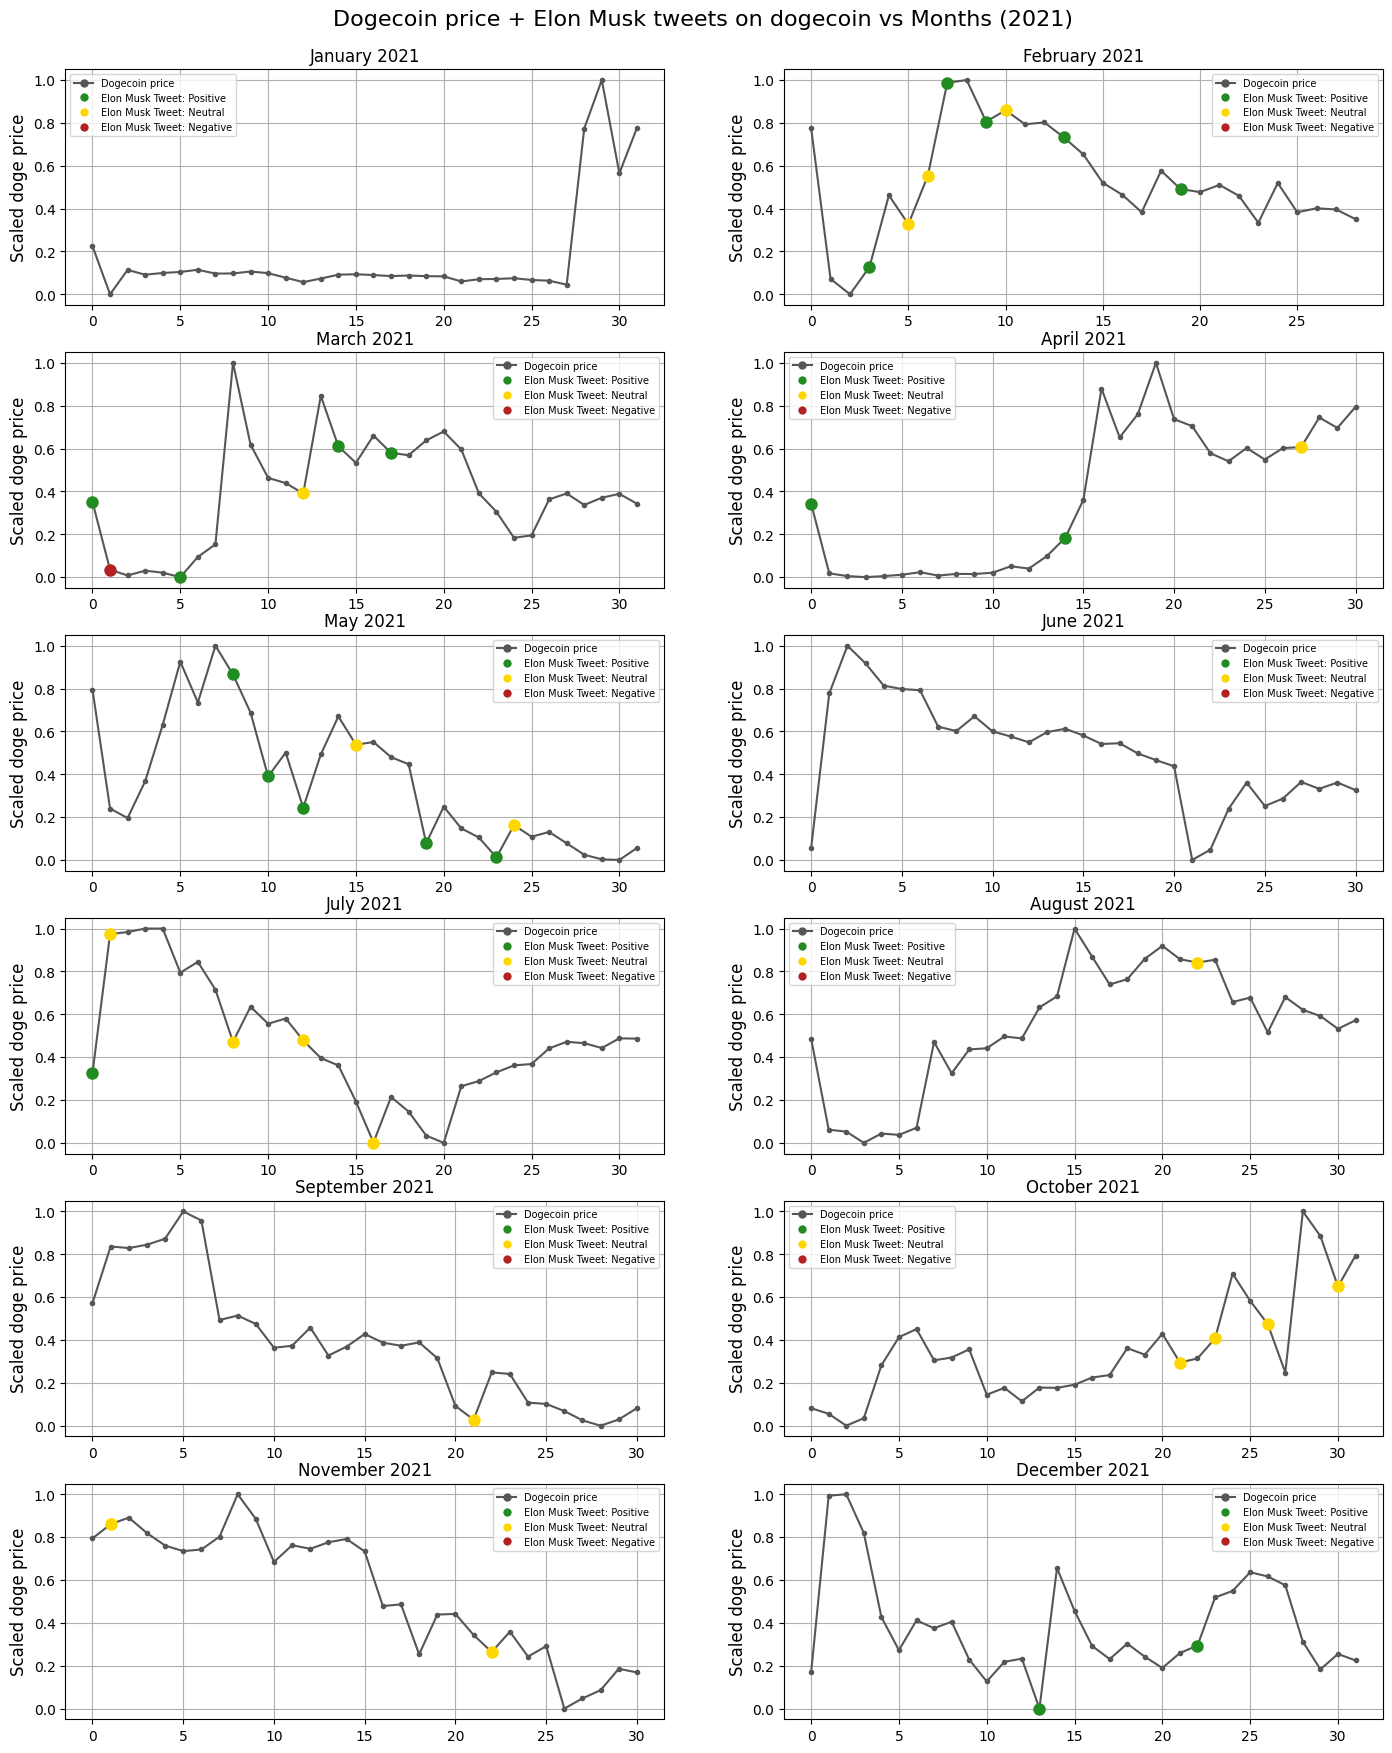

In [ ]:
mnths = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

def draw_charts():

  fig = plt.figure(figsize=(17, 20), dpi=100)
  plt.suptitle("Dogecoin price + Elon Musk tweets on dogecoin vs Months (2021)", fontsize=16)

  for j in range(12):

    month, data, monthly_scaled_price_ls_2021_temp = get_values_for_plotting(j)
    plot_df = pd.DataFrame(data, columns=list(data.keys()))

    plt.subplot(6, 2, j+1)
    plt.plot(plot_df["day"], plot_df["tweet_price"], label="dogecoin price", marker='o', markersize=3, color='#565656')

    if len(monthly_elon_tweets_2021[month])>0:
      for key, value in enumerate(monthly_elon_tweets_2021[month]):
        color_dict = {-1:'firebrick', 0:'gold', 1:'forestgreen'}
        plt.plot(value-1, monthly_scaled_price_ls_2021_temp[value-1],  marker="o", markersize=9, markerfacecolor=color_dict[monthly_elon_tweet_labels_2021[month][key]], markeredgewidth=0.0) # point coordinates
        # plt.text(value, monthly_scaled_price_ls_2021[month][value-1]+0.02,f"{monthly_elon_tweet_labels_2021[month][key]}")

    plt.title(f"{month} 2021", fontsize=12)
    plt.ylabel("Scaled doge price", fontsize=12)
  
    legend1 = Line2D([0], [0], label='Dogecoin price', marker='o', markersize=5, color='#565656')
    legend4 = Line2D(range(1), range(1), color="white", marker='o', markersize=7, markerfacecolor='forestgreen', label='Elon Musk Tweet: Positive')
    legend2 = Line2D(range(1), range(1), color="white", marker='o', markersize=7, markerfacecolor='firebrick', label='Elon Musk Tweet: Negative')
    legend3 = Line2D(range(1), range(1), color="white", marker='o', markersize=7, markerfacecolor='gold', label='Elon Musk Tweet: Neutral')
    
    plt.legend(handles=[legend1, legend4, legend3, legend2], loc="best", fontsize=7)
    plt.grid(True)

  fig.subplots_adjust(top=0.95)
  plt.show()
  fig.savefig(f"dogecoin_price_and_elon_musk_sentiment.png") 

draw_charts()

In [ ]:
elon_musk_monthly_sentiments = np.array([0, 0.62, 0.67, 0.67, 0.71, 0, 0, 0, 0, 0, 1.0])
elon_musk_monthly_positive_sentiments = np.array([0.,  0.62, 0.67, 0.67, 0.71, 0.2,  0.,   0.,   0.,   0.,   1.  ])
avg_monthly_closing_price_dogecoin = np.array([0.0, 0.93009406, 0.60310266, 0.55500662, 0.50601921, 0.82544183, 1., 0.58441042, 0.50803594, 0.98460222, 0.60915724])
monthly_closing_price_dogecoin = np.array([0.17128152, 0.51560806, 0.39455383, 0.37674838, 0.35861294, 0.47686516,
 0.54148767, 0.38763385, 0.35935955, 0.53578732, 0.39679528])

monthly_and_elon_corr, _ = spearmanr( elon_musk_monthly_positive_sentiments, monthly_closing_price_dogecoin)
print('Correlation between elon musk sentiment with average dogecoin price: %.3f' % monthly_and_elon_corr)

Correlation between elon musk sentiment with average dogecoin price: -0.124


In [ ]:
df.head()

,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source,cleaned_tweet,predicted_labels,hugging_labels
0,1.360000e+18,3.134341e+09,Nobody,"You can’t stop us, you fucks #dogecoin https:/...",2021,1,31,22:50:54,Twitter for iPhone,"you can’t stop us, you fucks #dogecoin",0,-1
1,1.360000e+18,1.320000e+18,Nobody,https://t.co/EGyJXssO6l\n\nLet's share it to t...,2021,1,31,23:28:43,Twitter for Android,let's share it to the entire social network to...,0,1
2,1.360000e+18,1.290000e+18,Nobody,#dogecoin is sounding more and more like essen...,2021,1,31,23:28:34,Twitter for Android,#dogecoin is sounding more and more like essen...,0,-1
3,1.360000e+18,1.360000e+18,Nobody,to spread the past week and xrp link https t h...,2021,1,31,23:28:31,Error-log,to spread the past week and xrp link https t h...,0,0
4,1.360000e+18,1.350000e+18,Nobody,If every owner that owns a dog would put 10$ i...,2021,1,31,23:28:27,Twitter for iPhone,if every owner that owns a dog would put 10$ i...,0,0


In [ ]:
# monthly_elon_tweet_labels_2021
scaler = MinMaxScaler()
elon_monthly_sentiment_polarity = []
elon_monthly_sentiment_polarity_positive = []
elon_monthly_sentiment_polarity_negative = []
elon_monthly_sentiment_polarity_neutral = []

for key, values in monthly_elon_tweet_labels_2021.items():
  # print(key)
  if key == "June":
    continue
  values = np.array(values)
  # print(values)
  pos, neg, neu = 0, 0, 0
  per_pos, per_neg, per_neu = 0, 0, 0
  if len(values)>0:
    for value in np.nditer(values):
      if value == 1:
        pos+=1
      elif value == -1:
        neg+=1
      else:
        neu+=1
    per_pos, per_neg, per_neu = round(pos/len(values),2), -round(neg/len(values),2), round(neu/len(values),2)
  per_polarity = {
      1: per_pos,
      -1: per_neg,
      0: per_neu
  }
  print(key, per_polarity)
  per_polarity = dict(sorted(per_polarity.items(), key=lambda item: item[1], reverse=True))
  for key_1, value_1 in per_polarity.items():
    if key_1 == 0:
      elon_monthly_sentiment_polarity.append(0)
    elif key_1 == 1 or -1:
      elon_monthly_sentiment_polarity.append(list(per_polarity.values())[0])
    break
  # elon_monthly_sentiment_polarity.append(list(per_polarity.values())[0])
  elon_monthly_sentiment_polarity_positive.append(per_polarity[1])
  elon_monthly_sentiment_polarity_negative.append(per_polarity[-1])
  elon_monthly_sentiment_polarity_neutral.append(per_polarity[0])

elon_monthly_sentiment_polarity_positive[0] = 0.0
print("Without scaling:")
print(elon_monthly_sentiment_polarity_positive)
print(elon_monthly_sentiment_polarity_negative)
print(elon_monthly_sentiment_polarity_neutral)
elon_monthly_sentiment_polarity_positive = scaler.fit_transform(np.array(elon_monthly_sentiment_polarity_positive).reshape(-1,1)).T[0]
elon_monthly_sentiment_polarity_negative = scaler.fit_transform(np.array(elon_monthly_sentiment_polarity_negative).reshape(-1,1)).T[0]
elon_monthly_sentiment_polarity_neutral = scaler.fit_transform(np.array(elon_monthly_sentiment_polarity_neutral).reshape(-1,1)).T[0]
print("Scaled:")
print(elon_monthly_sentiment_polarity_positive)
print(elon_monthly_sentiment_polarity_negative)
print(elon_monthly_sentiment_polarity_neutral)

elon_monthly_sentiment_polarity[0]=0
print("Maximum sentiment:")
print(elon_monthly_sentiment_polarity)
# elon_monthly_sentiment_polarity = scaler.fit_transform(np.array(elon_monthly_sentiment_polarity).reshape(-1,1)).T[0] 

# print("Scaled maximum sentiment:")
# print(elon_monthly_sentiment_polarity)
# def NormalizeData(data):
#     return (data - np.min(data)) / (np.max(data) - np.min(data))

# print(np.array([1.0, -0.0, 0.0]))

# elon_monthly_sentiment_polarity[5]=-1

January {1: 0, -1: 0, 0: 0}
February {1: 0.62, -1: -0.0, 0: 0.38}
March {1: 0.67, -1: -0.17, 0: 0.17}
April {1: 0.67, -1: -0.0, 0: 0.33}
May {1: 0.71, -1: -0.0, 0: 0.29}
July {1: 0.2, -1: -0.0, 0: 0.8}
August {1: 0.0, -1: -0.0, 0: 1.0}
September {1: 0.0, -1: -0.0, 0: 1.0}
October {1: 0.0, -1: -0.0, 0: 1.0}
November {1: 0.0, -1: -0.0, 0: 1.0}
December {1: 1.0, -1: -0.0, 0: 0.0}
Without scaling:
[0.0, 0.62, 0.67, 0.67, 0.71, 0.2, 0.0, 0.0, 0.0, 0.0, 1.0]
[0, -0.0, -0.17, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
[0, 0.38, 0.17, 0.33, 0.29, 0.8, 1.0, 1.0, 1.0, 1.0, 0.0]
Scaled:
[0.   0.62 0.67 0.67 0.71 0.2  0.   0.   0.   0.   1.  ]
[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.   0.38 0.17 0.33 0.29 0.8  1.   1.   1.   1.   0.  ]
Maximum sentiment:
[0, 0.62, 0.67, 0.67, 0.71, 0, 0, 0, 0, 0, 1.0]


In [ ]:
positive_count_ls = []
negative_count_ls = []
neutral_count_ls = []
for month in list(df.month.unique()):
  month_df = df[df.month == month]
  positive_count_ls.append(month_df[month_df.hugging_labels == 1].count().tweet_id)
  negative_count_ls.append(month_df[month_df.hugging_labels == -1].count().tweet_id)
  neutral_count_ls.append(month_df[month_df.hugging_labels == 0].count().tweet_id)

scaler = MinMaxScaler()
scaled_positive_count_ls = scaler.fit_transform(np.array(positive_count_ls).reshape(-1,1)).T[0] 
scaled_negative_count_ls = scaler.fit_transform(np.array(negative_count_ls).reshape(-1,1)).T[0]
scaled_neutral_count_ls = scaler.fit_transform(np.array(neutral_count_ls).reshape(-1,1)).T[0]

# peoples_sentiment_2021 = {
#     "positive": scaled_positive_count_ls,
#     "negative": scaled_negative_count_ls,
#     "neutral": scaled_neutral_count_ls
# }

peoples_sentiment_2021 = {
    "positive": positive_count_ls,
    "negative": negative_count_ls,
    "neutral": neutral_count_ls
}

peoples_sentiment_2021

{'negative': [251, 1443, 890, 161, 617, 185, 61, 65, 159, 89, 69],
 'neutral': [1267, 6871, 5708, 847, 2707, 1076, 452, 614, 873, 532, 499],
 'positive': [1100, 6383, 6027, 870, 2483, 902, 341, 644, 728, 473, 373]}

In [ ]:
# extract monthly closing price for dogecoin 2021
mnths_1 = ["January", "February", "March", "April", "May", "July", "August", "September", "October", "November", "December"]
monthly_scaled_price_ls_2021_1 = {}

for mnth_1 in mnths_1:
  monthly_scaled_price_ls_2021_1[mnth_1] = monthly_scaled_price_ls_2021[mnth_1]

monthly_closing_price_2021 = []
for key, value in monthly_scaled_price_ls_2021_1.items():
  monthly_closing_price_2021.append(np.average(value))
print(np.array(monthly_closing_price_2021))
monthly_closing_price_2021 = scaler.fit_transform(np.array(monthly_closing_price_2021).reshape(-1,1)).T[0]*5000
monthly_closing_price_2021

[0.17128152 0.51560806 0.39455383 0.37674838 0.35861294 0.47686516
 0.54148767 0.38763385 0.35935955 0.53578732 0.39679528]


array([   0.        , 4650.47031763, 3015.51329329, 2775.03308663,
       2530.09605992, 4127.20916765, 5000.        , 2922.05210023,
       2540.17968771, 4923.01112487, 3045.78620952])

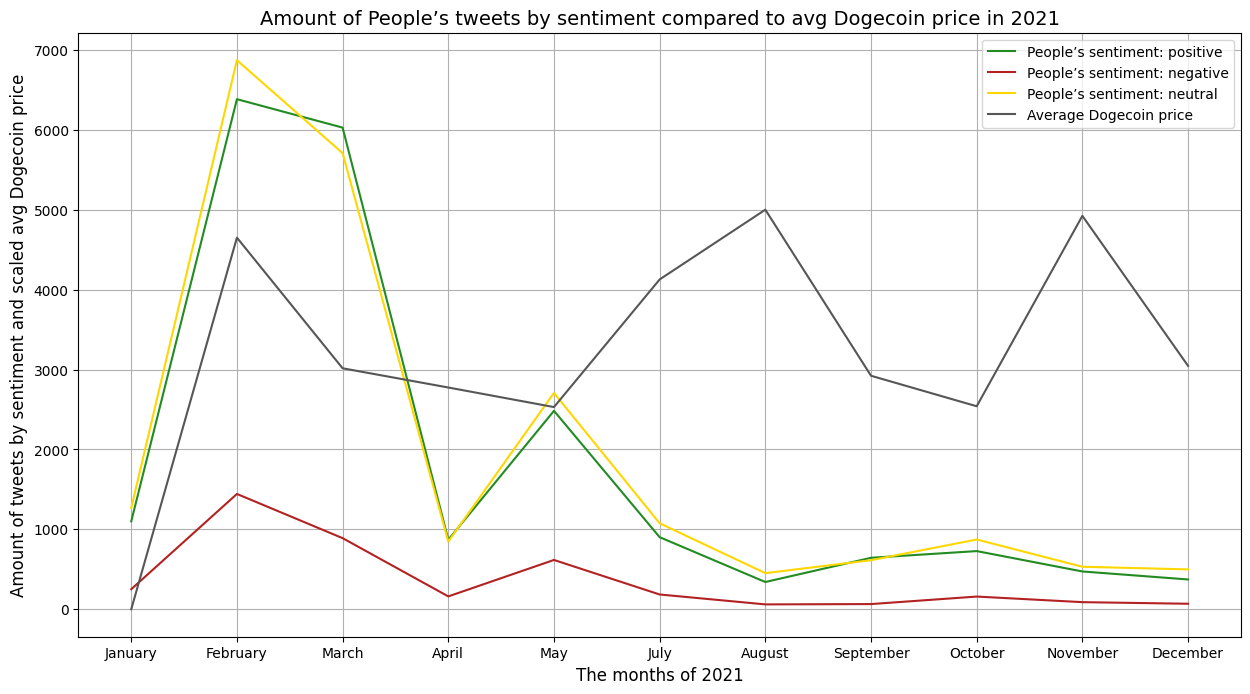

In [ ]:
# relation between dogecoin price and people sentiment
data = {"months": mnths_1, # you have to put the number of a month for ex: 1->January, 2->february
        "positive": peoples_sentiment_2021["positive"],
        "negative": peoples_sentiment_2021["negative"],
        "neutral": peoples_sentiment_2021["neutral"],
        "elon_polarity": elon_monthly_sentiment_polarity,
        "tweet_price": monthly_closing_price_2021
      }
plt.rcParams["figure.figsize"] = (15, 8)
plot_df = pd.DataFrame(data, columns=list(data.keys()))
fig = plt.figure(figsize=(15, 8), dpi=100)
plt.plot(plot_df["months"], plot_df["positive"], label="People’s sentiment: positive", color='forestgreen')
plt.plot(plot_df["months"], plot_df["negative"], label="People’s sentiment: negative", color='firebrick')
plt.plot(plot_df["months"], plot_df["neutral"], label="People’s sentiment: neutral", color='gold')
# plt.plot(plot_df["months"], plot_df["elon_polarity"], label="elon musk sentiment", color='blue')
plt.plot(plot_df["months"], plot_df["tweet_price"], label="Average Dogecoin price", color='#565656')

plt.title(f"Amount of People’s tweets by sentiment compared to avg Dogecoin price in 2021", fontsize=14)
plt.xlabel(f"The months of 2021", fontsize=12)
plt.ylabel("Amount of tweets by sentiment and scaled avg Dogecoin price", fontsize=12)
plt.legend(loc="best")
plt.grid(True)
fig.savefig(f"peoples_sentiment_with_dogecoin_price.png") 
plt.show()

In [ ]:
positive_corr, _ = spearmanr( peoples_sentiment_2021["positive"], monthly_closing_price_2021)
negative_corr, _ = pearsonr( peoples_sentiment_2021["negative"], monthly_closing_price_2021)
neutral_corr, _ = pearsonr( peoples_sentiment_2021["neutral"], monthly_closing_price_2021)
print('Correlation between peoples positive sentiment with average dogecoin price: %.3f' % positive_corr)
print('Correlation between peoples negative sentiment with average dogecoin price: %.3f' % negative_corr)
print('Correlation between peoples neutral sentiment with average dogecoin price: %.3f' % neutral_corr)

Correlation between peoples positive sentiment with average dogecoin price: -0.373
Correlation between peoples negative sentiment with average dogecoin price: 0.129
Correlation between peoples neutral sentiment with average dogecoin price: 0.122


In [ ]:
for ix, month in enumerate(mnths_1):
  df_month = df[df.month == ix+1]
  df_month_days = list(set(df_month.day.unique()))
  print(month)
  print(df_month_days)
  for day in df_month_days:
    # print(day)
    print(len(df_month[df_month.day == day]))
  print()

January
[31]
2618

February
[4, 6, 8, 11, 15, 20, 25, 26, 27, 28]
1812
1137
3260
2018
645
450
1093
654
1640
1988

March
[1, 2, 6, 7, 13, 14, 15, 16, 18, 19, 27, 28, 29, 30, 31]
773
1234
1684
512
301
1505
90
665
263
679
677
1062
954
1281
945

April
[1, 28, 15]
635
699
544

May
[10, 11, 14, 16, 20, 24, 25, 26]
676
696
694
1218
1095
549
640
239

July
[]

August
[1, 2, 9, 13, 17]
561
403
292
314
593

September
[24, 23]
639
215

October
[22, 23]
494
829

November
[24, 27, 22, 31]
546
521
272
421

December
[2, 3, 23]
220
221
653



In [ ]:

scaler = MinMaxScaler()
month_days_count = {
    "February":{
        "days": [],
        "doge_prices":[]
    },
    "March":{
        "days": [],
        "doge_prices":[]
    },
    "May":{
        "days": [],
        "doge_prices":[]
    },
    "October":{
        "days": [],
        "doge_prices":[]
    },
    "December":{
        "days": [],
        "doge_prices":[]
    }
}

month_days = {
    "February":[25, 26, 27, 28],
    "March": [27, 28, 29, 30, 31],
    "May": [24, 25, 26],
    "October": [22, 23],
    "December": [2, 3]
}
months_ls = [2, 3, 5, 9, 11]
for ix, (month, days) in enumerate(month_days.items()):
  df_month = df[df.month == months_ls[ix]]
  # print(df_month.day.unique(), month)
  month_counts = []
  day_prices = []
  for day in  days:
    month_counts.append(len(df_month[df_month.day == day]))
    # print(monthly_scaled_price_ls_2021[month][day-1])
    day_prices.append(monthly_scaled_price_ls_2021[month][day-1])
  scaled_month_counts = scaler.fit_transform(np.array(month_counts).reshape(-1,1)).T[0]
  scaled_day_prices = scaler.fit_transform(np.array(day_prices).reshape(-1,1)).T[0]*2000
  month_days_count[month]["days"] = scaled_month_counts
  month_days_count[month]["doge_prices"] = day_prices


print(month_days_count)

{'February': {'days': array([0.32908546, 0.        , 0.73913043, 1.        ]), 'doge_prices': [0.38290338897319187, 0.40111279716742554, 0.3958017197774406, 0.35053110773899854]}, 'March': {'days': array([0.        , 0.63741722, 0.45860927, 1.        , 0.44370861]), 'doge_prices': [0.39047619047619087, 0.33679653679653665, 0.37056277056277054, 0.38874458874458906, 0.34285714285714297]}, 'May': {'days': array([0.77306733, 1.        , 0.        ]), 'doge_prices': [0.16279799247176907, 0.10853199498117949, 0.13080301129234628]}, 'October': {'days': array([0., 1.]), 'doge_prices': [0.31386861313868586, 0.40729927007299294]}, 'December': {'days': array([0., 1.]), 'doge_prices': [1.0, 0.8191721132897603]}}


In [ ]:
for ix, (month, day_price) in enumerate(month_days_count.items()):
  # print(ix, month, day_price)
  corr, _ = spearmanr(day_price["days"], day_price["doge_prices"])
  print(f'Correlation between peoples tweet with dogecoin price for month {month} days {month_days[month]}: %.3f' % corr)

Correlation between peoples tweet with dogecoin price for month February days [25, 26, 27, 28]: -0.800
Correlation between peoples tweet with dogecoin price for month March days [27, 28, 29, 30, 31]: -0.300
Correlation between peoples tweet with dogecoin price for month May days [24, 25, 26]: -0.500
Correlation between peoples tweet with dogecoin price for month October days [22, 23]: 1.000
Correlation between peoples tweet with dogecoin price for month December days [2, 3]: -1.000
